# Exercise 2 — Multiple Linear Regression (Train/Test) — With Diagnostics
This notebook fits a Multiple Linear Regression (MLR) model using the **Train** sheet and evaluates on the **Test** sheet.

**Assumptions**
- File: `data-set-for-MLR.xlsx`
- Sheet **Train**: first column = **Y** (target), remaining columns = **X1..Xk** (features)
- Sheet **Test**: same structure and column order as Train

**Notation**: \( Y = c + \, \sum_i m_i X_i \)  (intercept = **c**, slopes = **mᵢ**)


## 1) Import libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import statsmodels.api as sm
from pathlib import Path

# We will use only matplotlib for plotting.


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2) Load Train/Test data and preview the first rows

In [2]:
# Read Excel sheets (Train and Test). If file not present, synthesize demo data so the notebook runs.
path = Path("/content/drive/MyDrive/IIT Bombay/data-set-for-MLR.xlsx")
if path.exists():
    train = pd.read_excel(path, sheet_name="Train")
    test  = pd.read_excel(path, sheet_name="Test")
    print("Loaded 'data-set-for-MLR.xlsx' (Train/Test).")
else:
    # Synthetic fallback
    rng = np.random.default_rng(7)
    X_train = pd.DataFrame({
        "X1": rng.normal(size=85),
        "X2": rng.uniform(-2, 2, size=85),
        "X3": rng.normal(3, 1.5, size=85),
        "X4": rng.normal(0, 2, size=85),
        "X5": rng.uniform(-1, 1, size=85)
    })
    y_train = 4 + 1.8*X_train["X1"] - 1.2*X_train["X2"] + 0.9*X_train["X3"] + 0.5*X_train["X4"] - 0.7*X_train["X5"] + rng.normal(0, 0.7, 85)
    train = pd.concat([pd.Series(y_train, name="Y"), X_train], axis=1)

    X_test = pd.DataFrame({
        "X1": rng.normal(size=15),
        "X2": rng.uniform(-2, 2, size=15),
        "X3": rng.normal(3, 1.5, size=15),
        "X4": rng.normal(0, 2, size=15),
        "X5": rng.uniform(-1, 1, size=15)
    })
    y_test = 4 + 1.8*X_test["X1"] - 1.2*X_test["X2"] + 0.9*X_test["X3"] + 0.5*X_test["X4"] - 0.7*X_test["X5"] + rng.normal(0, 0.7, 15)
    test = pd.concat([pd.Series(y_test, name="Y"), X_test], axis=1)
    print("NOTE: Using synthetic demo data because 'data-set-for-MLR.xlsx' was not found.")

print("Train dataset preview:")
print(train.head())
print("\nTest dataset preview:")
print(test.head())

NOTE: Using synthetic demo data because 'data-set-for-MLR.xlsx' was not found.
Train dataset preview:
          Y        X1        X2        X3        X4        X5
0  6.735661  0.001230  0.278777  2.964834  0.094240 -0.886451
1  6.750583  0.298746 -0.494849  3.107163 -2.345091  0.990723
2  3.257246 -0.274138 -0.356179  1.871533 -1.881400  0.777399
3  8.259664 -0.890592 -1.042043  3.682176  2.261226  0.832648
4  8.119354 -0.454671 -1.847771  2.191054  0.315253 -0.506849

Test dataset preview:
          Y        X1        X2        X3        X4        X5
0  2.528982 -1.893807  1.087345  2.075284 -0.283126 -0.572337
1  3.441869 -0.393657  0.838268  2.558470 -0.878410  0.906712
2  5.146607 -0.030903 -1.217710 -0.112910  1.104680  0.772394
3  6.407653 -0.084054 -1.452272  3.137261 -3.329203 -0.771286
4  7.825198 -0.093792 -0.714288  3.226475  0.920907 -0.369596


## 3) Split into features (X) and target (Y)

In [3]:
# First column is Y, remaining columns are X1..Xk
y_train = train.iloc[:, 0]
X_train = train.iloc[:, 1:]

y_test  = test.iloc[:, 0]
X_test  = test.iloc[:, 1:]

print("Shapes -> X_train:", X_train.shape, "| y_train:", y_train.shape)
print("Shapes -> X_test :", X_test.shape,  "| y_test :", y_test.shape)

Shapes -> X_train: (85, 5) | y_train: (85,)
Shapes -> X_test : (15, 5) | y_test : (15,)


## 4) Fit Linear Regression (sklearn) on Train and evaluate on Test

In [4]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Intercept (c) and slopes (mᵢ)
c = mlr.intercept_
m = dict(zip(X_train.columns, mlr.coef_))

print("Intercept (c):", c)
print("Slopes (mᵢ):", m)

# Predictions
y_pred_train = mlr.predict(X_train)
y_pred_test  = mlr.predict(X_test)

# Metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test,  y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\nPerformance:")
print("R² (Train):", r2_train)
print("R² (Test) :", r2_test)
print("MAE (Test):", mae_test)
print("RMSE (Test):", rmse_test)

Intercept (c): 3.986462132997418
Slopes (mᵢ): {'X1': np.float64(1.7534529039546587), 'X2': np.float64(-1.1763762111149916), 'X3': np.float64(0.822494708528179), 'X4': np.float64(0.5340871965490627), 'X5': np.float64(-0.5225067792847377)}

Performance:
R² (Train): 0.9417375760657295
R² (Test) : 0.8589707820678473
MAE (Test): 0.4449503817308154
RMSE (Test): 0.5621178364745147


## 5) Plot: Actual vs Predicted on Test set

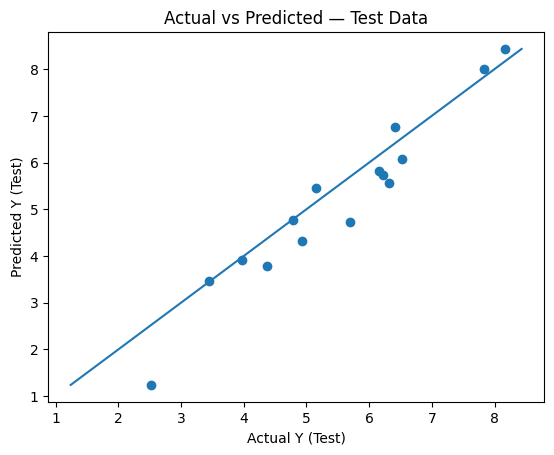

In [5]:
plt.figure()
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Y (Test)")
plt.ylabel("Predicted Y (Test)")
plt.title("Actual vs Predicted — Test Data")
lims = [min(y_test.min(), y_pred_test.min()), max(y_test.max(), y_pred_test.max())]
plt.plot(lims, lims)
plt.show()

## 6) Residual diagnostics: Residuals vs Predicted (Train & Test)

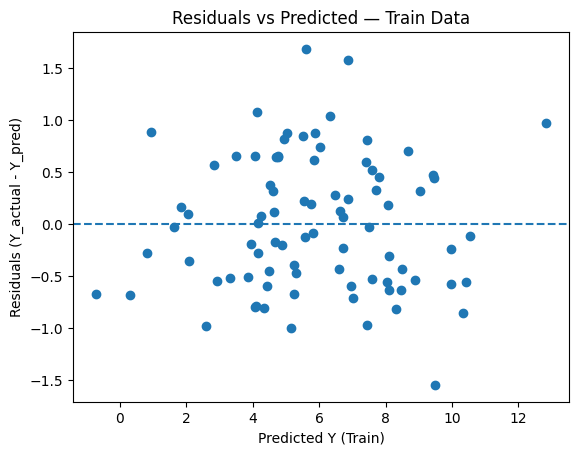

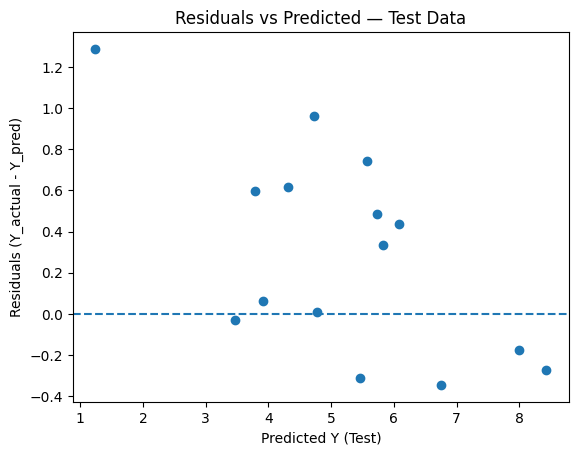

In [6]:
# Residuals
residuals_train = y_train - y_pred_train
residuals_test  = y_test - y_pred_test

# Residuals vs Predicted (Train)
plt.figure()
plt.scatter(y_pred_train, residuals_train)
plt.axhline(y=0, linestyle='--')
plt.xlabel("Predicted Y (Train)")
plt.ylabel("Residuals (Y_actual - Y_pred)")
plt.title("Residuals vs Predicted — Train Data")
plt.show()

# Residuals vs Predicted (Test)
plt.figure()
plt.scatter(y_pred_test, residuals_test)
plt.axhline(y=0, linestyle='--')
plt.xlabel("Predicted Y (Test)")
plt.ylabel("Residuals (Y_actual - Y_pred)")
plt.title("Residuals vs Predicted — Test Data")
plt.show()

## 7) Residual distribution (histogram)

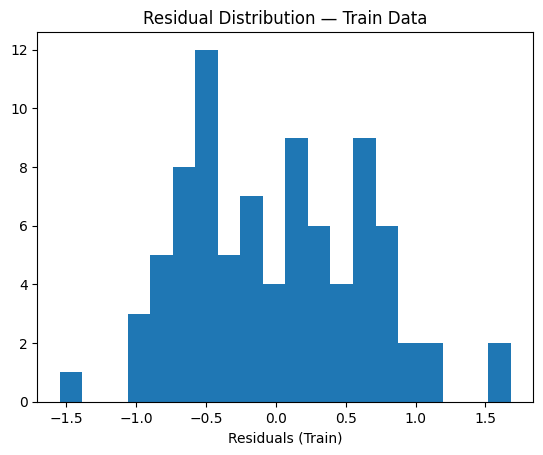

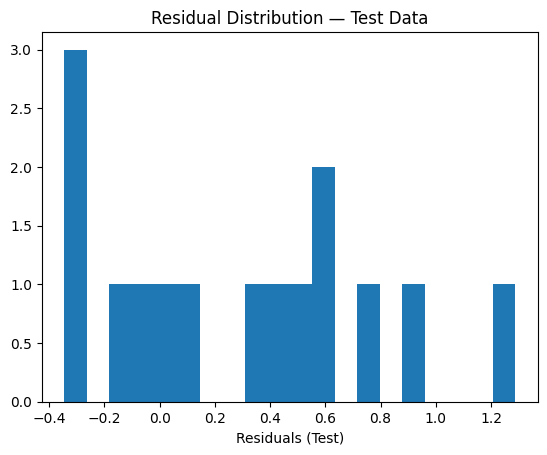

In [7]:
plt.figure()
plt.hist(residuals_train, bins=20)
plt.xlabel("Residuals (Train)")
plt.title("Residual Distribution — Train Data")
plt.show()

plt.figure()
plt.hist(residuals_test, bins=20)
plt.xlabel("Residuals (Test)")
plt.title("Residual Distribution — Test Data")
plt.show()

## 8) QQ plots (normality check)

<Figure size 640x480 with 0 Axes>

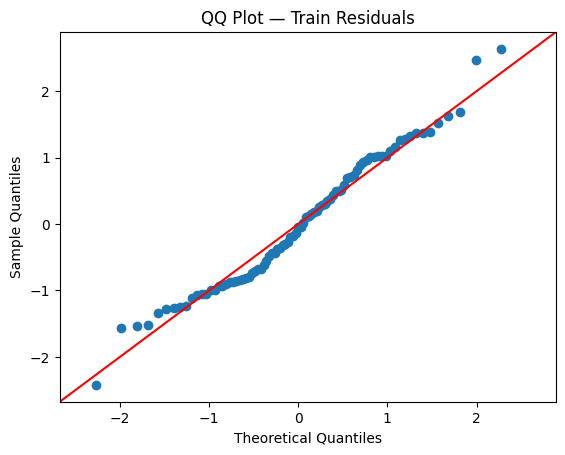

<Figure size 640x480 with 0 Axes>

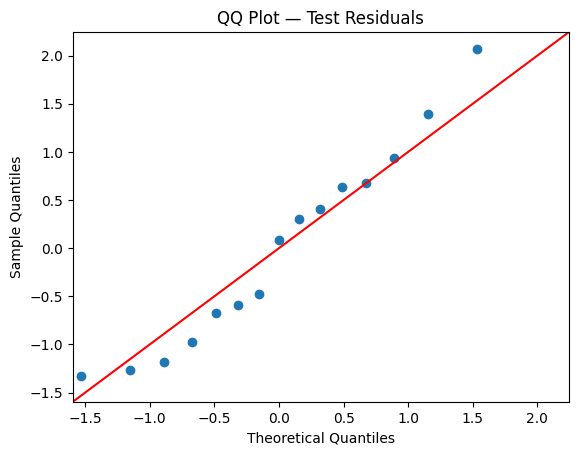

In [8]:
plt.figure()
sm.qqplot(residuals_train, line='45', fit=True)
plt.title("QQ Plot — Train Residuals")
plt.show()

plt.figure()
sm.qqplot(residuals_test, line='45', fit=True)
plt.title("QQ Plot — Test Residuals")
plt.show()

## 9) Statsmodels OLS on Train (detailed summary like Excel)

In [9]:
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print("Detailed OLS Summary (Train):")
print(ols_model.summary())

Detailed OLS Summary (Train):
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     255.4
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           3.06e-47
Time:                        08:48:33   Log-Likelihood:                -82.399
No. Observations:                  85   AIC:                             176.8
Df Residuals:                      79   BIC:                             191.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9865 

In [19]:
X_test_sm = sm.add_constant(X_test)
ols_model_test = sm.OLS(y_test, X_test_sm).fit()
print("Detailed OLS Summary (Test):")
print(ols_model_test.summary())

Detailed OLS Summary (Test):
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     29.40
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           2.56e-05
Time:                        09:38:52   Log-Likelihood:                -5.9396
No. Observations:                  15   AIC:                             23.88
Df Residuals:                       9   BIC:                             28.13
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2742  

## 10) (Optional) Quick diagnostics health report

In [10]:
from statsmodels.stats.stattools import jarque_bera, omni_normtest, durbin_watson

def regression_health_report(ols_model, X_sm, name="Model"):
    r2 = ols_model.rsquared
    r2_adj = ols_model.rsquared_adj
    f_p = ols_model.f_pvalue

    resid = ols_model.resid
    jb_stat, jb_p, skew, kurtosis = jarque_bera(resid)
    omni_stat, omni_p = omni_normtest(resid)
    dw = durbin_watson(resid)

    X_vals = X_sm.values if hasattr(X_sm, "values") else np.asarray(X_sm)
    cond_no = np.linalg.cond(X_vals)

    print(f"=== {name} : Diagnostics Health Report ===")
    print(f"R²                : {r2:.4f}")
    print(f"Adj. R²           : {r2_adj:.4f}")
    print(f"Prob(F-statistic) : {f_p:.4g}")
    print("\nResidual Normality:")
    print(f"  Jarque–Bera p   : {jb_p:.4g}")
    print(f"  Omnibus p       : {omni_p:.4g}")
    print(f"  Skew            : {skew:.3f}")
    print(f"  Kurtosis        : {kurtosis:.3f}")
    print("\nAutocorrelation:")
    print(f"  Durbin–Watson   : {dw:.3f}")
    print("\nNumerical Stability / Collinearity:")
    print(f"  Condition No.   : {cond_no:.1f}")
    print("==============================================")

regression_health_report(ols_model, X_train_sm, name="MLR (Train) — Diagnostics")

=== MLR (Train) — Diagnostics : Diagnostics Health Report ===
R²                : 0.9417
Adj. R²           : 0.9381
Prob(F-statistic) : 3.064e-47

Residual Normality:
  Jarque–Bera p   : 0.4289
  Omnibus p       : 0.4185
  Skew            : 0.259
  Kurtosis        : 2.542

Autocorrelation:
  Durbin–Watson   : 2.410

Numerical Stability / Collinearity:
  Condition No.   : 7.3
